# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

##### 1. Как критики относятся к спортивным играм?

Критикам нравятся спортивные игры?  
Критики, чаще ставят более высокие баллы спортивным играм?  

H0: Средняя оценка спортивных игр выше остальных >80%  
H1: Средняя оценка спортивных игр ниже 80%  

За alpha здесь и далее будем принимать 0.05  

Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.  

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'E:\Pyda-20\stat_case_study\vgsales.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df[df.Genre == 'Sports'].groupby(by='Genre')['Critic_Score'].mean()

Genre
Sports    71.968174
Name: Critic_Score, dtype: float64

<AxesSubplot:xlabel='Genre'>

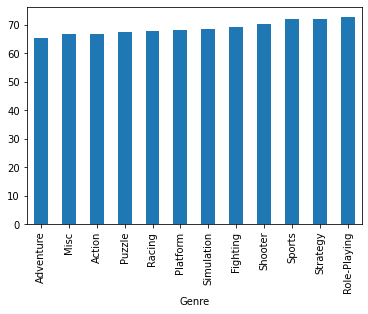

In [5]:
df.groupby(by='Genre')['Critic_Score'].mean().sort_values().plot(kind='bar')

In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


H0: Средняя оценка спортивных игр выше остальных >80%  
H1: Средняя оценка спортивных игр ниже 80%

In [7]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df[df.Genre == 'Sports']['Critic_Score'].dropna(), 80, alternative='less')

print(df[df.Genre == 'Sports']['Critic_Score'].mean())
print(result)
if result.pvalue > alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

71.96817420435511
Ttest_1sampResult(statistic=-19.99751475320892, pvalue=2.9649661125952924e-77)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критики оценивают спортивные игры до 80%  
H1 - Критики оценивают спортивные игры более 80%

In [8]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(df[df.Genre == 'Sports']['Critic_Score'].dropna(), 80, alternative='greater')

print(df[df.Genre == 'Sports']['Critic_Score'].mean())
print(result)
if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

71.96817420435511
Ttest_1sampResult(statistic=-19.99751475320892, pvalue=1.0)
Не отвергаем нулевую нулевую гипотезу.


#### 2. Критикам нравятся больше игры на PC или на PS4?

H0: Критикам нравятся больше игры на PC  
H1: Критикам нравятся больше игры на PS4

За alpha здесь и далее будем принимать 0.05

Сравниваем значение по выборке с константой, поэтому нужен одновыборочный критерий.

In [9]:
print(f"PS4 - {df[df.Platform == 'PS4']['Critic_Score'].mean()}, PC - {df[df.Platform == 'PC']['Critic_Score'].mean()}")

PS4 - 72.09126984126983, PC - 75.92867132867133


In [10]:
result = st.ttest_ind(df[df.Platform == 'PC']['Critic_Score'].dropna(), df[df.Platform == 'PS4']['Critic_Score'].dropna(), equal_var=False)
print(result)

if (result.pvalue > alpha):
    print('Отвергаем нулевую гипотезу, критикам нравятся игры на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)
Не отвергаем нулевую гипотезу


#### 3. Критикам больше нравятся стрелялки или стратегии?

H0 - Критикам  нравятся стрелялки до 80  
H1 - Критикам  нравятся стрелялки более 80

In [11]:
result = st.ttest_1samp(df[df.Genre == 'Shooter']['Critic_Score'].dropna(), 80, alternative='greater')

print(df[df.Genre == 'Shooter']['Critic_Score'].mean())
print(result)
if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, среднее больше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

70.18114406779661
Ttest_1sampResult(statistic=-20.730374525273128, pvalue=1.0)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критикам  нравятся стратегии более  80  
H1 - Критикам  нравятся стрелялки менее 80

In [12]:
result = st.ttest_1samp(df[df.Genre == 'Strategy']['Critic_Score'].dropna(), 80, alternative='less')

print(df[df.Genre == 'Strategy']['Critic_Score'].mean())
print(result)
if result.pvalue > alpha: 
    print('Отвергаем нулевую гипотезу, среднее меньше 80.')
else:
    print('Не отвергаем нулевую нулевую гипотезу.')

72.08609271523179
Ttest_1sampResult(statistic=-11.626946126343032, pvalue=2.323715829142146e-26)
Не отвергаем нулевую нулевую гипотезу.


H0 - Критикам больше нравятся стратегии  
H1 - Критикам нравятся Шутеры  
Двухфакторный тест

In [13]:
result = st.ttest_ind(df[df.Genre == 'Strategy']['Critic_Score'].dropna(), df[df.Genre == 'Shooter']['Critic_Score'].dropna(), equal_var=False)
print(result)

if (result.pvalue > alpha):
    print('Отвергаем нулевую гипотезу, критикам нравятся игры на PS4')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=2.2972408230640315, pvalue=0.021938989522304823)
Не отвергаем нулевую гипотезу


## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  
```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```
Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);    

7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;    

8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);    

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [81]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ingvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ingvar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [90]:
spam = pd.read_csv('spam.csv')

In [84]:
#Функции для обработки и подготовки датафрейма
#Приведение к единому регистру
def lower(col):
    return col.lower()

#Удаление спец символов
def del_sym(col):
    return re.sub('[\W_]+',' ', col)
#Удаление стоп слов и "мусора" оставшегося после удаления стоп слов
#все слова менее 2х символов не входя в итоговый список
def del_stop(col):
    stopwords_set = set(stopwords.words('english'))
    texts_splitted = col.split()
    #print('WITH STOP: ', texts_splitted)
    without_sw = [word for word in texts_splitted if word not in stopwords_set]
    b = []
    for i in without_sw:
        if len(i)>2:
            b.append(i)
    #print('NO STOP: ', without_sw)
    return b

#Приведение к нормальной формы слов в датафрейме
def lemma_word(col):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in col]
    #print(lemmatized_text)
    return lemmatized_text


In [91]:
spam.Message = spam.Message.apply(lower)

In [92]:
spam.Message = spam.Message.apply(del_sym)

In [93]:
spam.Message = spam.Message.apply(del_stop)

In [94]:
spam.Message = spam.Message.apply(lemma_word)

In [95]:
spam

,Category,Message
0,ham,"[jurong, point, crazy, available, bugis, great..."
1,ham,"[lar, joking, wif, oni]"
2,spam,"[free, entry, wkly, comp, win, cup, final, tkt..."
3,ham,"[dun, say, early, hor, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, contact, 750, pound, prize,..."
5568,ham,"[going, esplanade, home]"
5569,ham,"[pity, mood, suggestion]"
5570,ham,"[guy, bitching, acted, like, interested, buyin..."


In [103]:
def list_to_string(col):
    s = ''
    for n,i in enumerate(col):
        s += i
        if n>=0 and n<len(col)-1:
            s+= ' '
    #print(s)
    return s

In [104]:
spam.Message = spam.Message.apply(list_to_string)

In [105]:
spam

,Category,Message
0,ham,jurong point crazy available bugis great world...
1,ham,lar joking wif oni
2,spam,free entry wkly comp win cup final tkts 21st m...
3,ham,dun say early hor already say
4,ham,nah think go usf life around though
...,...,...
5567,spam,2nd time tried contact 750 pound prize claim e...
5568,ham,going esplanade home
5569,ham,pity mood suggestion
5570,ham,guy bitching acted like interested buying some...


In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [111]:
tfidf_matrix

,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,0207,02072069400,...,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
